<center>

# EDA - LOS ANGELES CRIME

</center>

## Import libraries

In [90]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [91]:
total_data = pd.read_csv("../data/interim/eda_data.csv")

## Exploration and data cleaning

In [92]:
total_data.head(5)

,date_occ,time_occ,area_name,rpt_dist_no,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon
0,2020-01-08,2230,Southwest,377,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,2020-01-01,330,Central,163,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,2020-02-13,1200,Central,155,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,POLICE FACILITY,NaN,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,2020-01-01,1730,N Hollywood,1543,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,2020-01-01,415,Mission,1998,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,NaN,Invest Cont,14400 TITUS ST,34.2198,-118.4468


In [93]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433936 entries, 0 to 433935
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date_occ      433936 non-null  object 
 1   time_occ      433936 non-null  int64  
 2   area_name     433936 non-null  object 
 3   rpt_dist_no   433936 non-null  int64  
 4   crm_cd_desc   433936 non-null  object 
 5   mocodes       374863 non-null  object 
 6   vict_age      433936 non-null  int64  
 7   vict_sex      377464 non-null  object 
 8   vict_descent  377461 non-null  object 
 9   premis_desc   433651 non-null  object 
 10  weapon_desc   154873 non-null  object 
 11  status_desc   433936 non-null  object 
 12  location      433936 non-null  object 
 13  lat           433936 non-null  float64
 14  lon           433936 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 49.7+ MB


In [94]:
total_data["date_occ"] = pd.to_datetime(total_data["date_occ"]).dt.date
total_data["date_occ"] = pd.to_datetime(total_data["date_occ"])

In [95]:
total_data["month"] = total_data["date_occ"].apply(lambda x:x.strftime("%A"))
total_data["weekday"] = total_data["date_occ"].apply(lambda x:x.strftime("%B"))

### Count and eliminate duplicates

In [96]:
duplicate_count = total_data.duplicated().sum()
duplicate_count

0

## Eliminate irrelevant information

In [97]:
columns = total_data.columns
columns

Index(['date_occ', 'time_occ', 'area_name', 'rpt_dist_no', 'crm_cd_desc',
       'mocodes', 'vict_age', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'lat', 'lon', 'month',
       'weekday'],
      dtype='object')

## Analysis of univariate variables

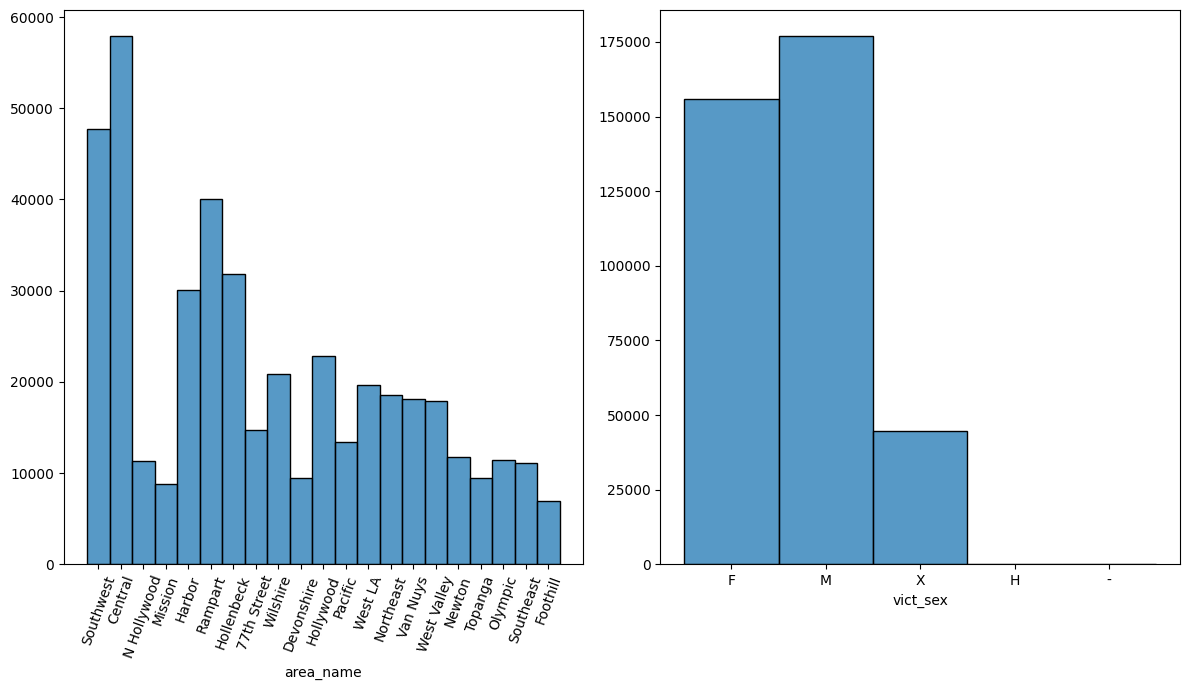

In [98]:
fig, axis = plt.subplots(1,2, figsize = (12, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "area_name").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=70)

sns.histplot(ax = axis[1], data = total_data, x = "vict_sex").set(ylabel = None)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [99]:
total_data['vict_sex'].isnull().sum()

56472

In [100]:
total_data['vict_sex'].value_counts()

vict_sex
M    176863
F    155883
X     44679
H        38
-         1
Name: count, dtype: int64

In [101]:
total_data = total_data[total_data['vict_sex'].isin(["M", "F", "X"]) | total_data['vict_sex'].isnull()]
total_data['vict_sex'].value_counts()

vict_sex
M    176863
F    155883
X     44679
Name: count, dtype: int64

In [102]:
total_data['vict_sex'].isnull().sum()

56472

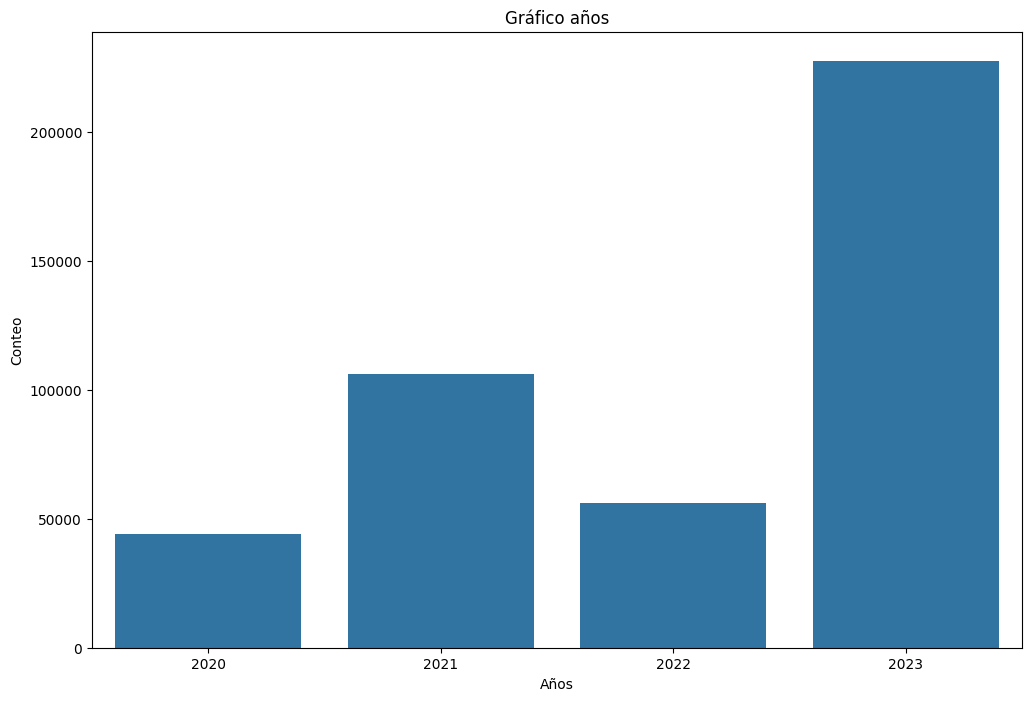

In [103]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=total_data["date_occ"].dt.year.value_counts().index, 
                 y=total_data["date_occ"].dt.year.value_counts())

# Configurar etiquetas y título
plt.xlabel('Años')
plt.ylabel('Conteo')
plt.title('Gráfico años')

# Mostrar el gráfico
plt.show()

In [104]:
delitos=total_data.value_counts("crm_cd_desc")[0:50]
delitos=pd.DataFrame(delitos)
delitos.head()

,count
crm_cd_desc,
VEHICLE - STOLEN,45699
BATTERY - SIMPLE ASSAULT,37054
BURGLARY FROM VEHICLE,28201
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",27128
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25645


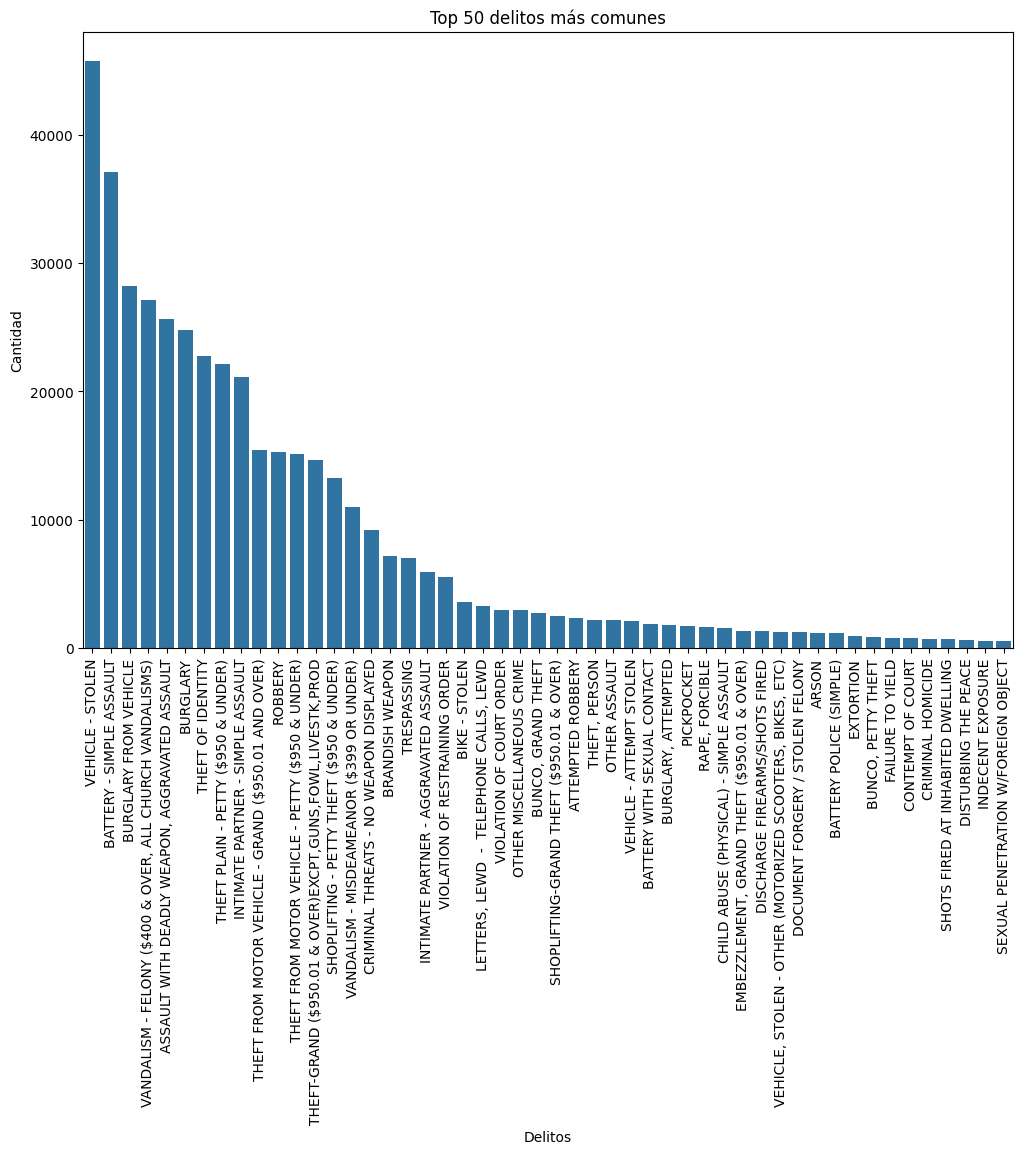

In [105]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=delitos.index, y=delitos['count'], data=delitos)

# Configurar etiquetas y título
plt.tick_params(axis = "x", labelrotation=90)
plt.xlabel('Delitos')
plt.ylabel('Cantidad')
plt.title('Top 50 delitos más comunes')

# Mostrar el gráfico
plt.show()

In [106]:
hours= pd.to_datetime(total_data["time_occ"].astype(str), format="%H%M", errors="coerce").dt.time
hours = hours.value_counts("time_occ")[0:50]
hours=pd.DataFrame(hours)
hours=hours.sort_index()
hours.head()

,proportion
time_occ,
03:00:00,0.015008
03:30:00,0.003604
04:00:00,0.007784
04:30:00,0.003507
05:00:00,0.007252


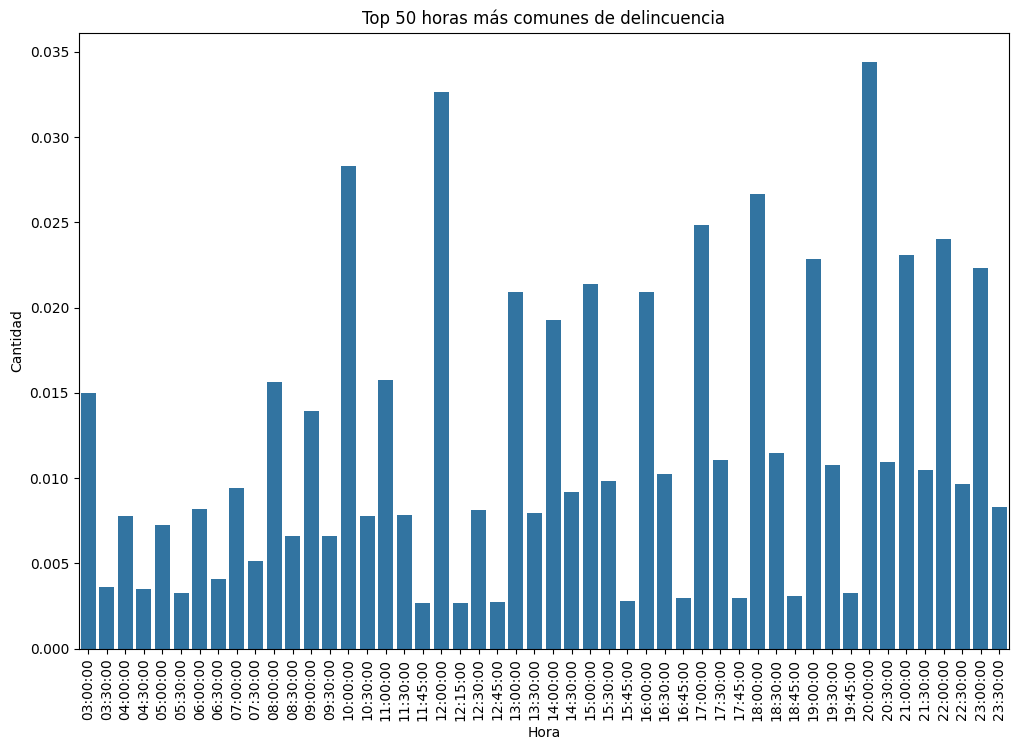

In [107]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=hours.index, y=hours['proportion'], data=hours)

# Configurar etiquetas y título
plt.tick_params(axis = "x", labelrotation=90)
plt.xlabel('Hora')
plt.ylabel('Cantidad')
plt.title('Top 50 horas más comunes de delincuencia')

# Mostrar el gráfico
plt.show()

In [108]:
rpt_codes=total_data.value_counts("rpt_dist_no")[0:50]
rpt_codes=pd.DataFrame(rpt_codes)
rpt_codes.head()

,count
rpt_dist_no,
162,4553
182,4015
111,3294
152,2607
153,2528


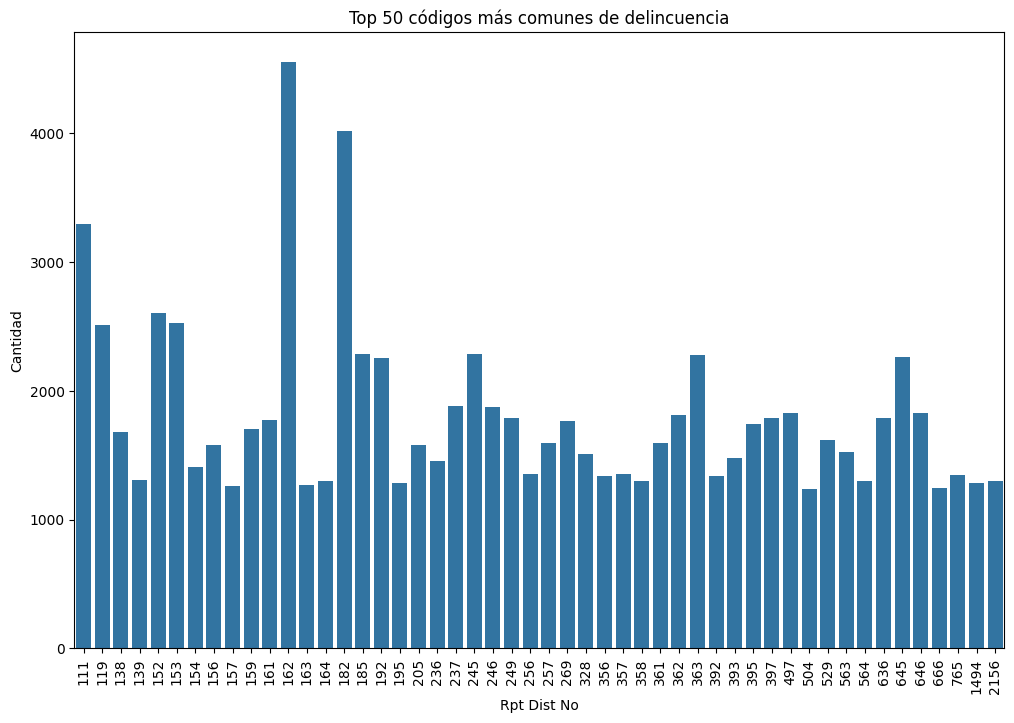

In [109]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=rpt_codes.index, y=rpt_codes['count'], data=rpt_codes)

# Configurar etiquetas y título
plt.tick_params(axis = "x", labelrotation=90)
plt.xlabel('Rpt Dist No')
plt.ylabel('Cantidad')
plt.title('Top 50 códigos más comunes de delincuencia')

# Mostrar el gráfico
plt.show()

<Axes: xlabel='vict_age'>

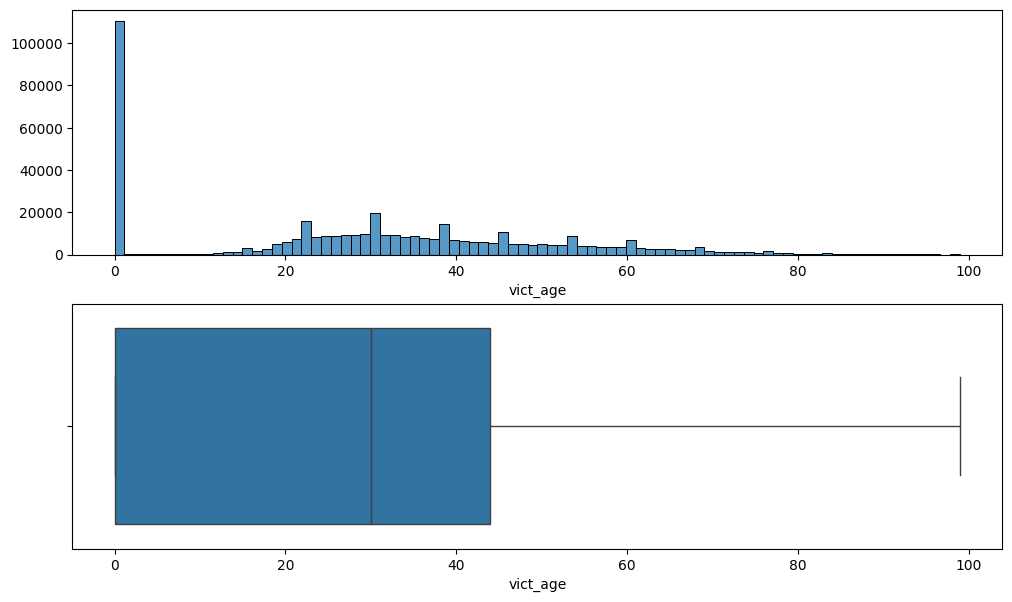

In [110]:
fig, axis = plt.subplots(2,1, figsize = (12, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "vict_age").set(ylabel = None) 
sns.boxplot(ax = axis[1], data = total_data, x = "vict_age")

<Axes: xlabel='date_occ'>

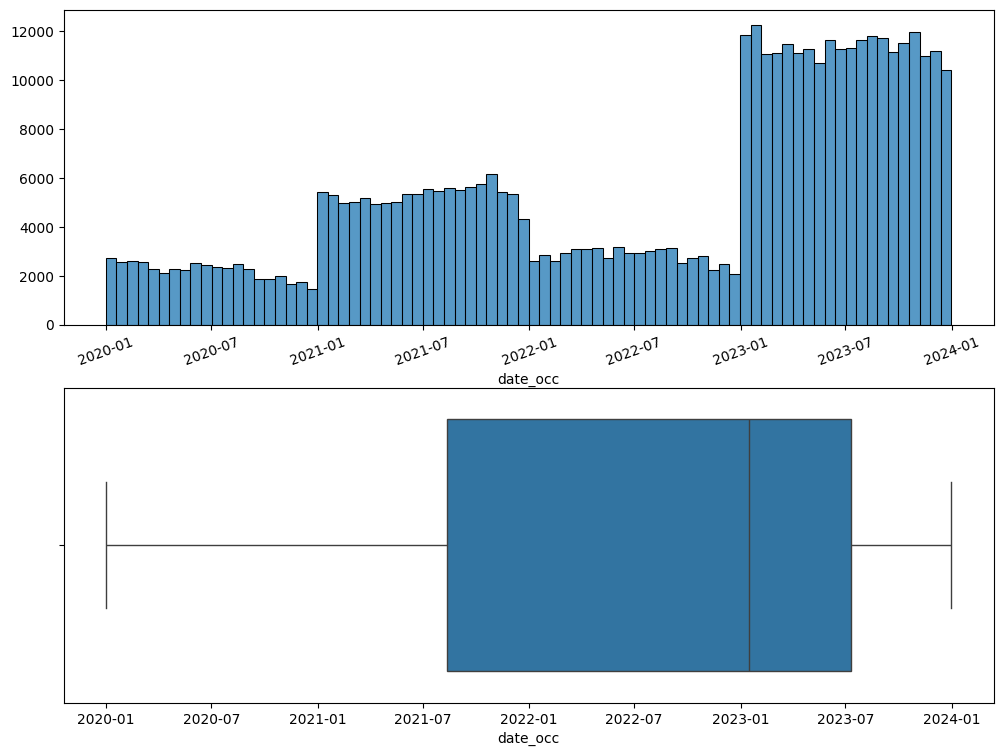

In [111]:
fig, axis = plt.subplots(2,1, figsize = (12, 9))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "date_occ").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=20)
sns.boxplot(ax = axis[1], data = total_data, x = "date_occ")#.set(xlabel = None)

In [112]:
descent=total_data.value_counts("vict_descent")
descent=pd.DataFrame(descent)
descent.head()

,count
vict_descent,
H,134284
W,82134
B,62354
X,48055
O,32125


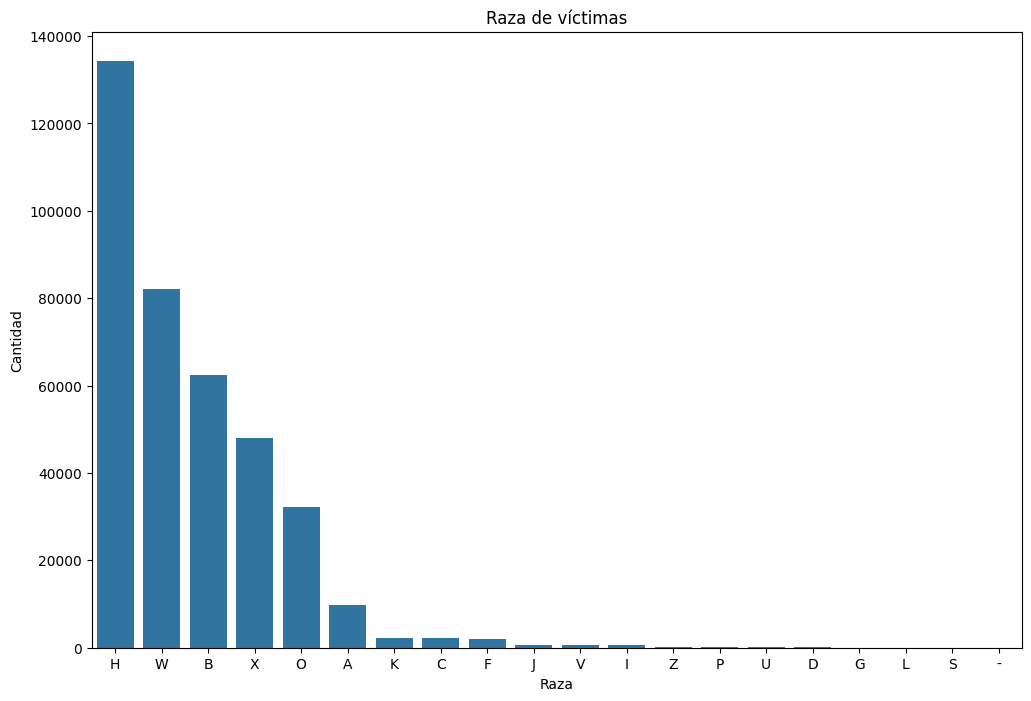

In [113]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=descent.index, y=descent['count'], data=descent)

# Configurar etiquetas y título
plt.xlabel('Raza')
plt.ylabel('Cantidad')
plt.title('Raza de víctimas')

# Mostrar el gráfico
plt.show()

In [114]:
total_data['vict_descent'].isnull().sum()

56475

In [115]:
total_data['vict_descent'].value_counts()

vict_descent
H    134284
W     82134
B     62354
X     48055
O     32125
A      9792
K      2214
C      2175
F      1912
J       690
V       564
I       515
Z       248
P       133
U        82
D        54
G        34
L        33
S        23
-         1
Name: count, dtype: int64

In [116]:
total_data = total_data[total_data['vict_descent'].isin(total_data['vict_descent'].unique()[:-1]) | total_data['vict_sex'].isnull()]
total_data['vict_descent'].value_counts()

vict_descent
H    134284
W     82134
B     62354
X     48055
O     32125
A      9792
K      2214
C      2175
F      1912
J       690
V       564
I       515
Z       248
P       133
U        82
D        54
G        34
L        33
S        23
Name: count, dtype: int64

In [117]:
weapon_desc=total_data.value_counts("weapon_desc")[0:50]
weapon_desc=pd.DataFrame(weapon_desc)
weapon_desc.head()

,count
weapon_desc,
"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",82486
UNKNOWN WEAPON/OTHER WEAPON,17572
VERBAL THREAT,11286
HAND GUN,9745
KNIFE WITH BLADE 6INCHES OR LESS,3371


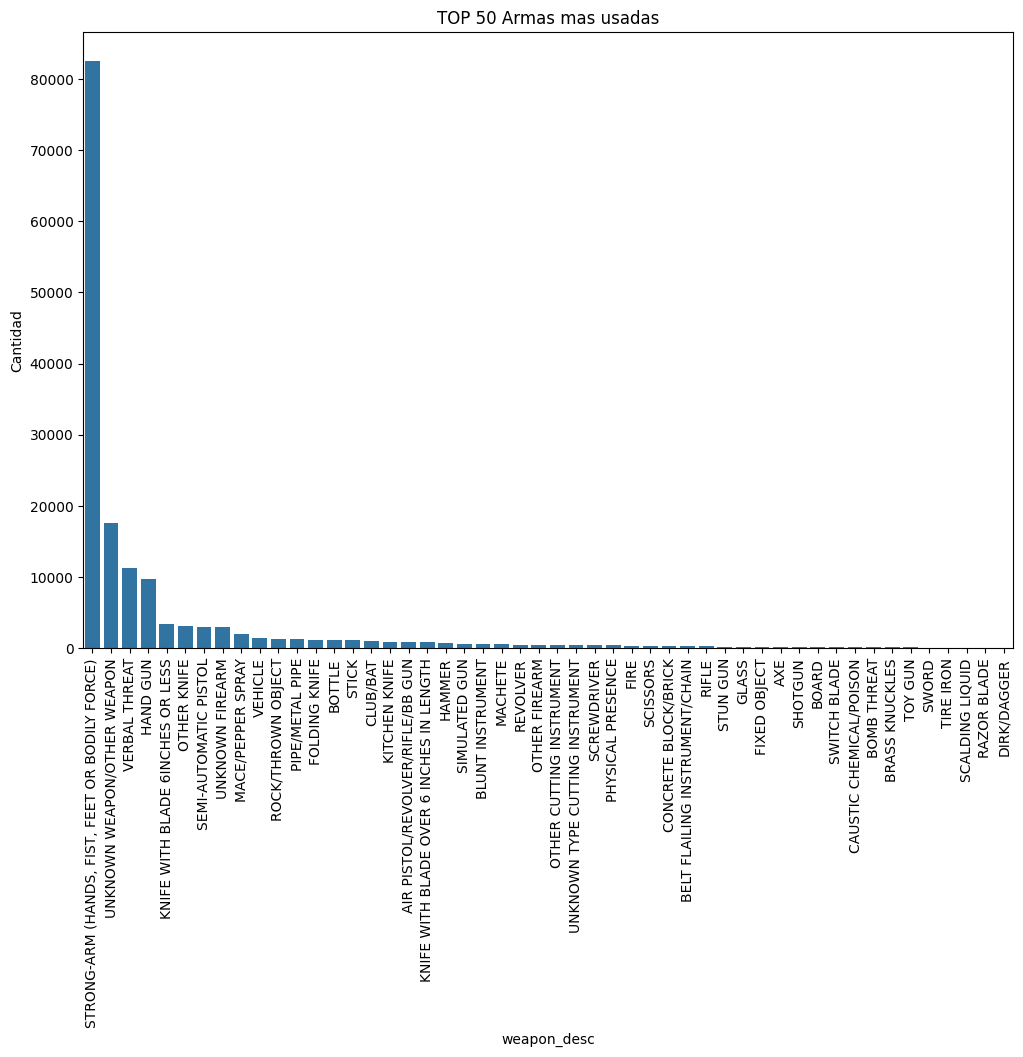

In [118]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=weapon_desc.index, y=weapon_desc['count'], data=weapon_desc)
plt.tick_params(axis = "x", labelrotation=90)

# Configurar etiquetas y título
plt.xlabel('weapon_desc')
plt.ylabel('Cantidad')
plt.title('TOP 50 Armas mas usadas')

# Mostrar el gráfico
plt.show()

In [119]:
is_weapon=total_data["weapon_desc"].isnull().value_counts()
is_weapon

weapon_desc
True     279036
False    154860
Name: count, dtype: int64

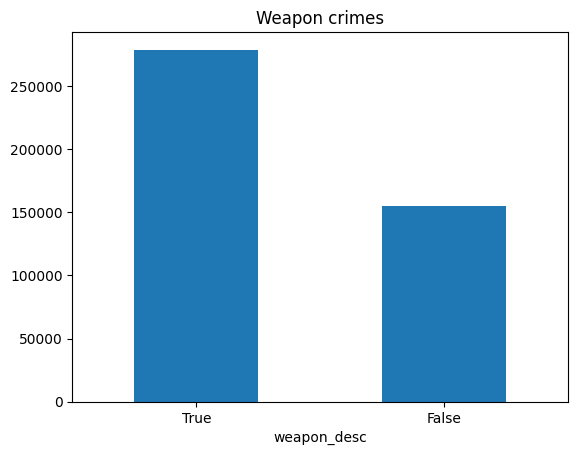

In [120]:
is_weapon.plot(kind='bar',rot=0, title='Weapon crimes')
plt.show()

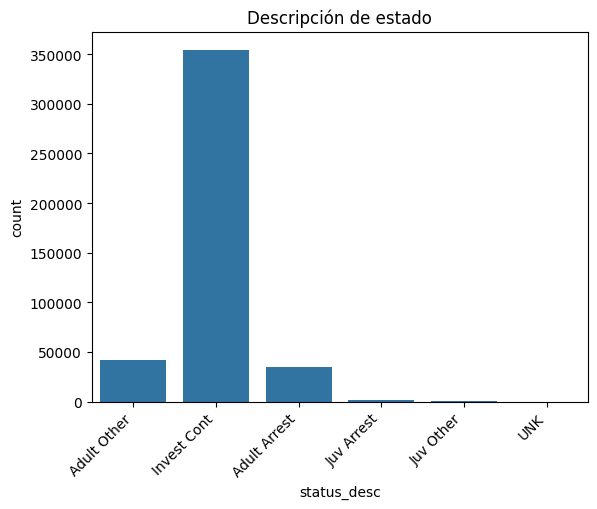

In [121]:
sns.countplot(x='status_desc', data=total_data)
plt.xticks(rotation=45, ha='right')
plt.title('Descripción de estado')
plt.show()

In [122]:
location = total_data.value_counts("location")[0:50]
location = pd.DataFrame(location)
location.head()


,count
location,
800 N ALAMEDA ST,1623
7TH,1247
6TH ST,1228
7TH ST,1178
6TH,1175


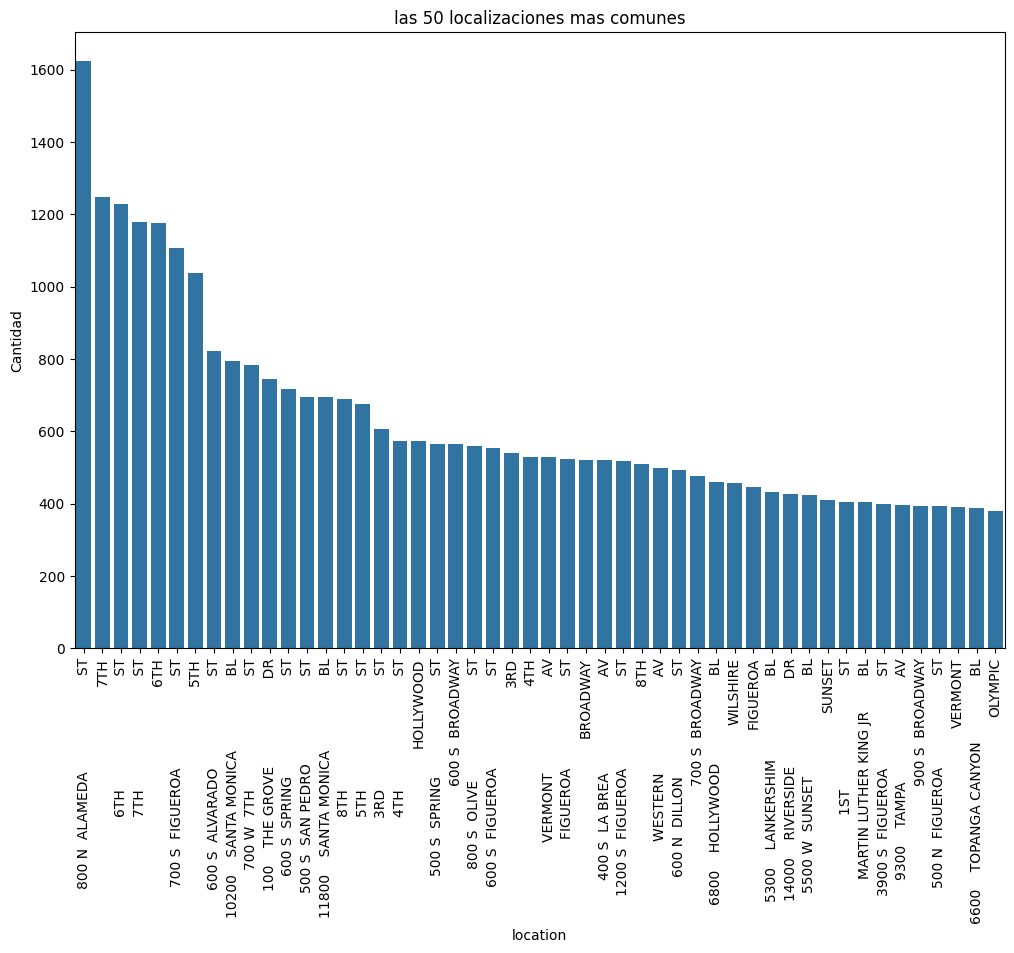

In [123]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=location.index, y=location['count'], data=location)

# Configurar etiquetas y título
plt.tick_params(axis = "x", labelrotation=90)
plt.xlabel('location')
plt.ylabel('Cantidad')
plt.title("las 50 localizaciones mas comunes")

# Mostrar el gráfico
plt.show()

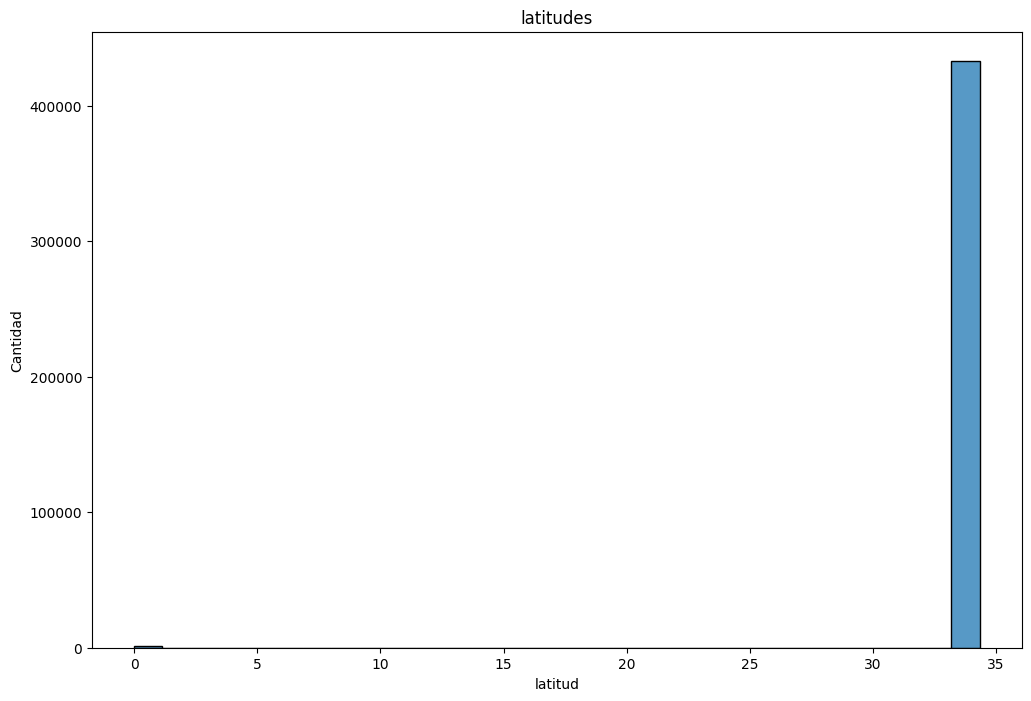

In [124]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
sns.histplot(x=total_data["lat"], bins=30, kde=False)

# Configurar etiquetas y título
plt.xlabel('latitud')
plt.ylabel('Cantidad')
plt.title('latitudes')

# Mostrar el gráfico
plt.show()

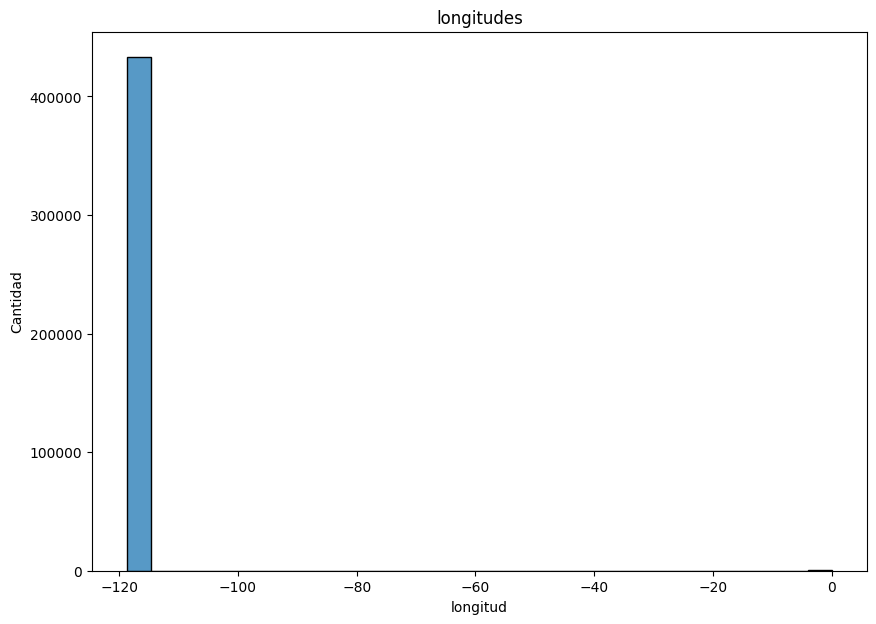

In [125]:
plt.figure(figsize=(10, 7))

# Crear el histograma utilizando Seaborn
sns.histplot(x=total_data["lon"], bins=30, kde=False)

# Configurar etiquetas y título
plt.xlabel('longitud')
plt.ylabel('Cantidad')
plt.title('longitudes')

# Mostrar el gráfico
plt.show()

In [126]:
total_data.drop(total_data.loc[total_data["lat"] == 0].index, axis=0, inplace= True)

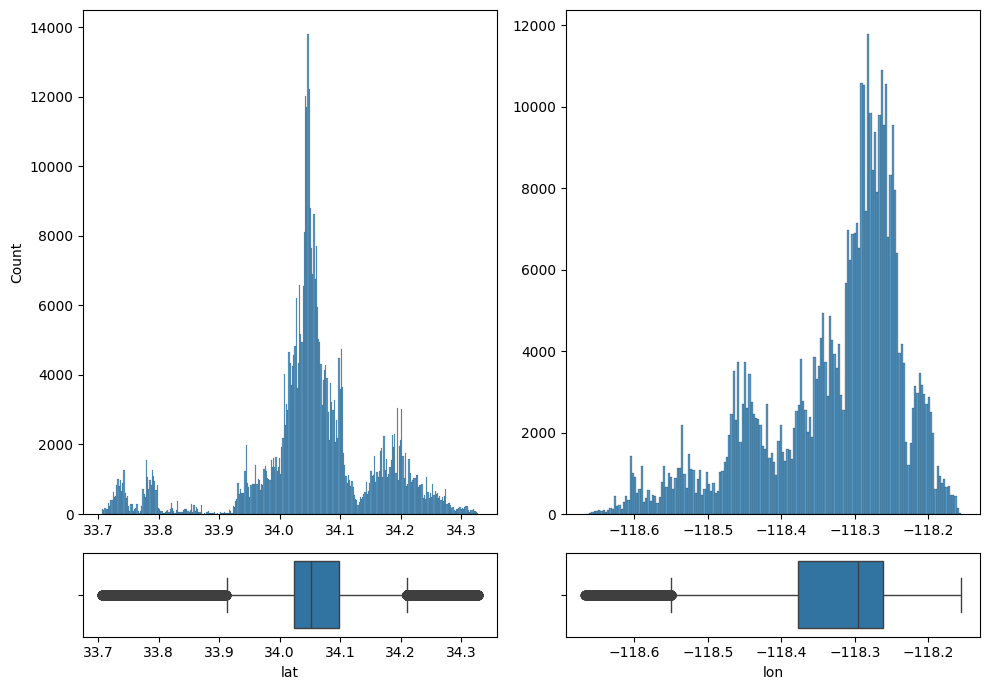

In [127]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})
# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "lat").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "lat")
sns.histplot(ax = axis[0, 1], data = total_data, x = "lon").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "lon")
# Ajustar el layout
plt.tight_layout()
# Mostrar el plot
plt.show()

In [128]:
mocodes=total_data['mocodes'].str.split(" ")

In [129]:
frecuencias = mocodes.apply(pd.Series).stack().value_counts()
frecuencias=frecuencias[0:20]

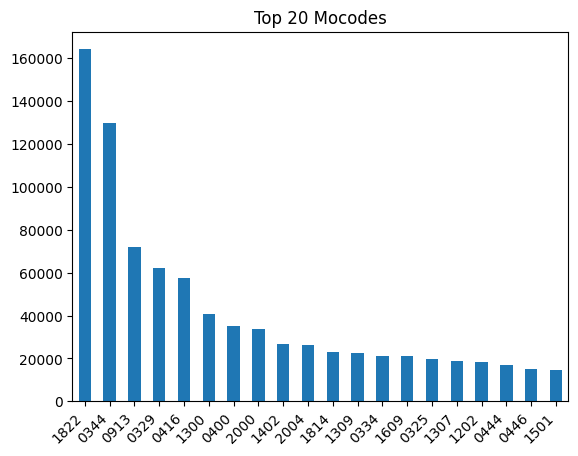

In [130]:
frecuencias.plot(kind='bar',rot=0, title='Top 20 Mocodes')
plt.xticks(rotation=45, ha='right')
plt.show()

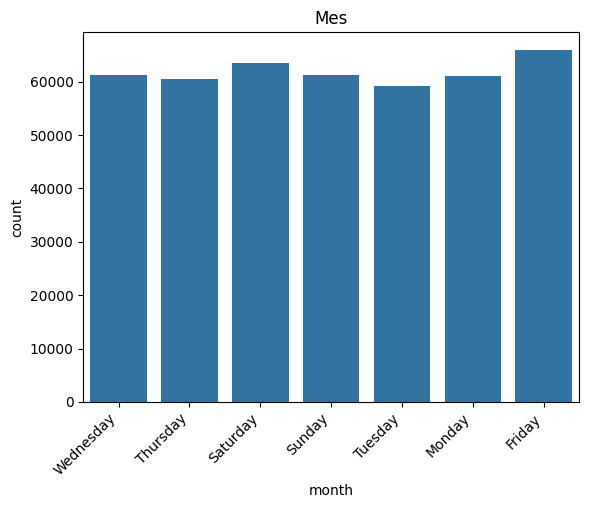

In [131]:
sns.countplot(x="month", data=total_data)
plt.xticks(rotation=45, ha='right')
plt.title('Mes')
plt.show()

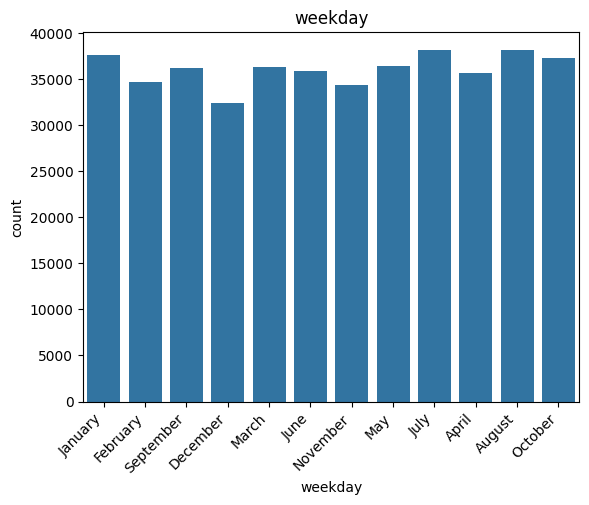

In [132]:
sns.countplot(x="weekday", data=total_data)
plt.xticks(rotation=45, ha='right')
plt.title('weekday')
plt.show()

## Analysis of multivariate variables

Numerical-numerical analysis

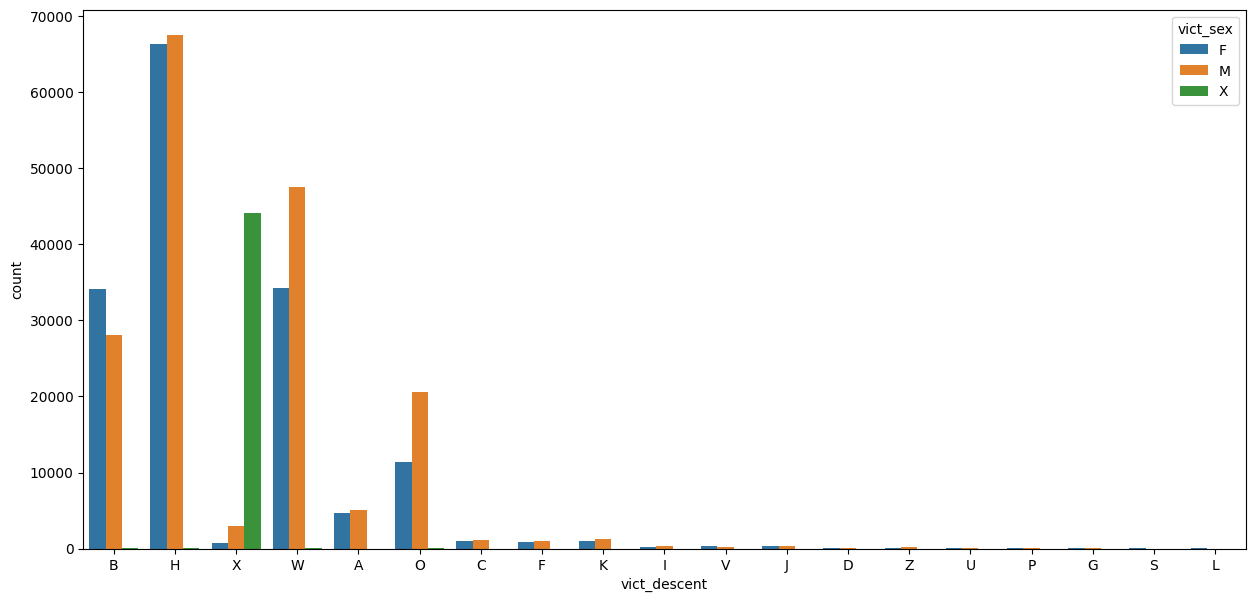

In [133]:
plt.figure(figsize=(15, 7))

# Create a multiple scatter diagram
sns.countplot(data = total_data, x ="vict_descent" , hue = "vict_sex")

# Show the plot
plt.show()

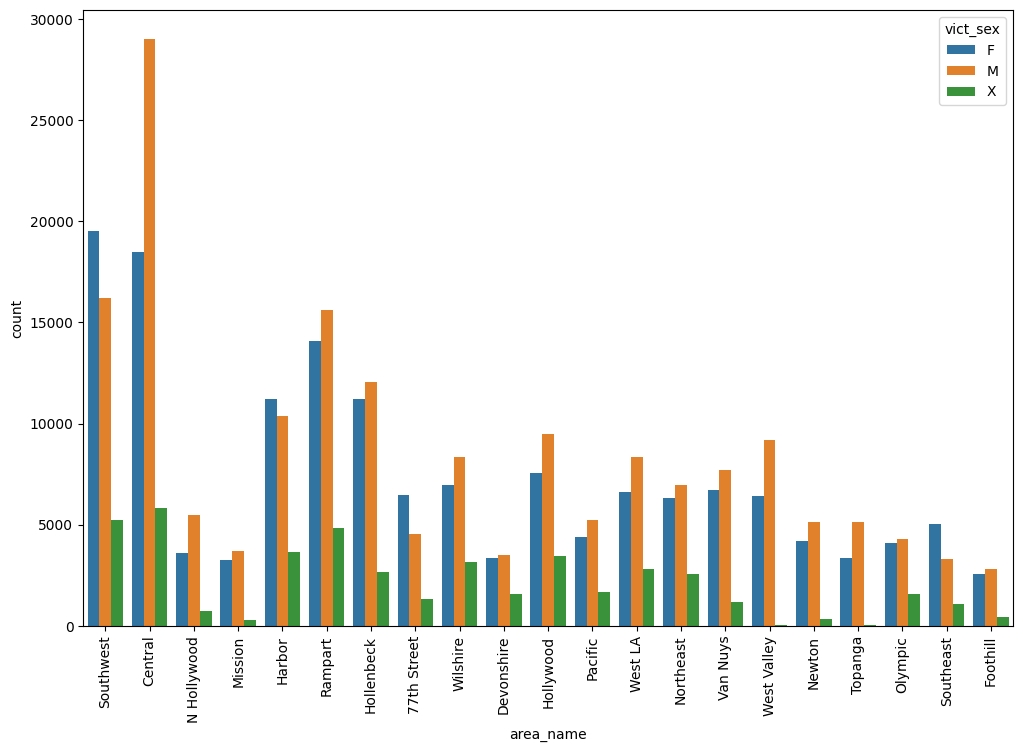

In [134]:
plt.figure(figsize=(12, 8))
# Create a multiple scatter diagram
sns.countplot( data = total_data, x = "area_name", hue = "vict_sex")
plt.tick_params(axis = "x", labelrotation=90)
# Show the plot
plt.show()

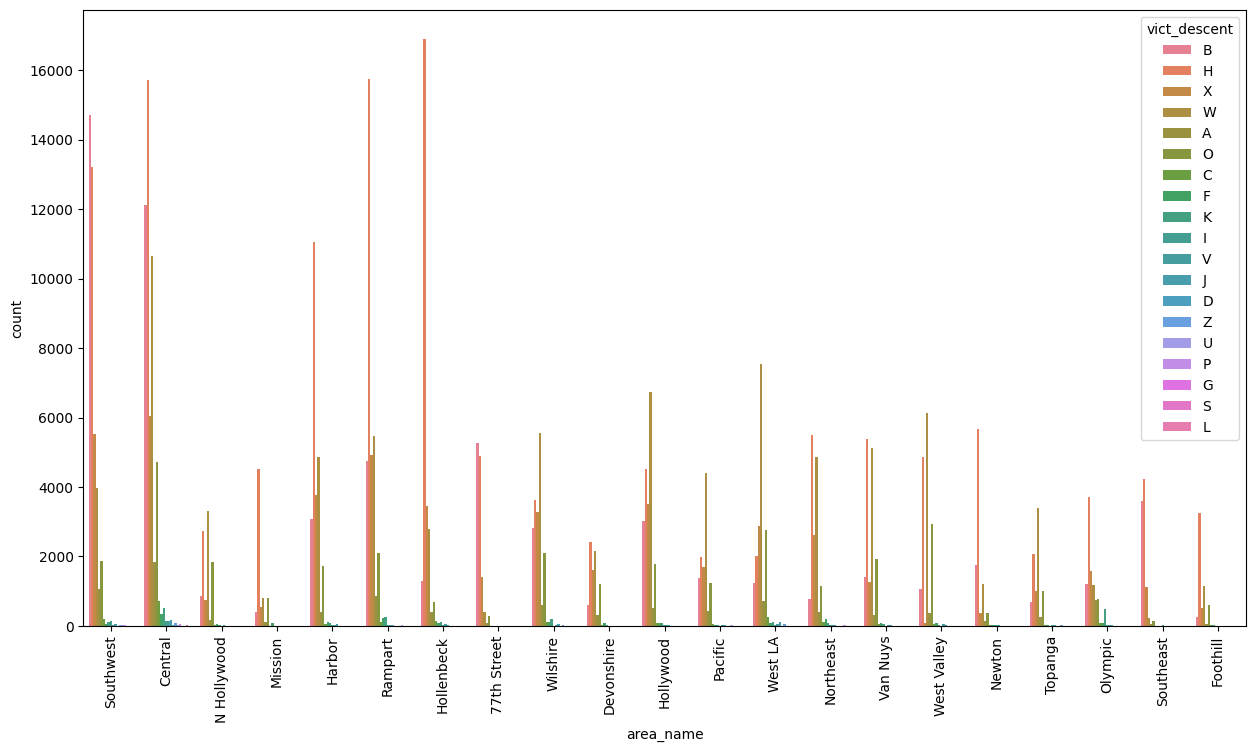

In [135]:
plt.figure(figsize=(15, 8))
# Create a multiple scatter diagram
sns.countplot( data = total_data, x = "area_name", hue = "vict_descent")
plt.tick_params(axis = "x", labelrotation=90)
# Show the plot
plt.show()

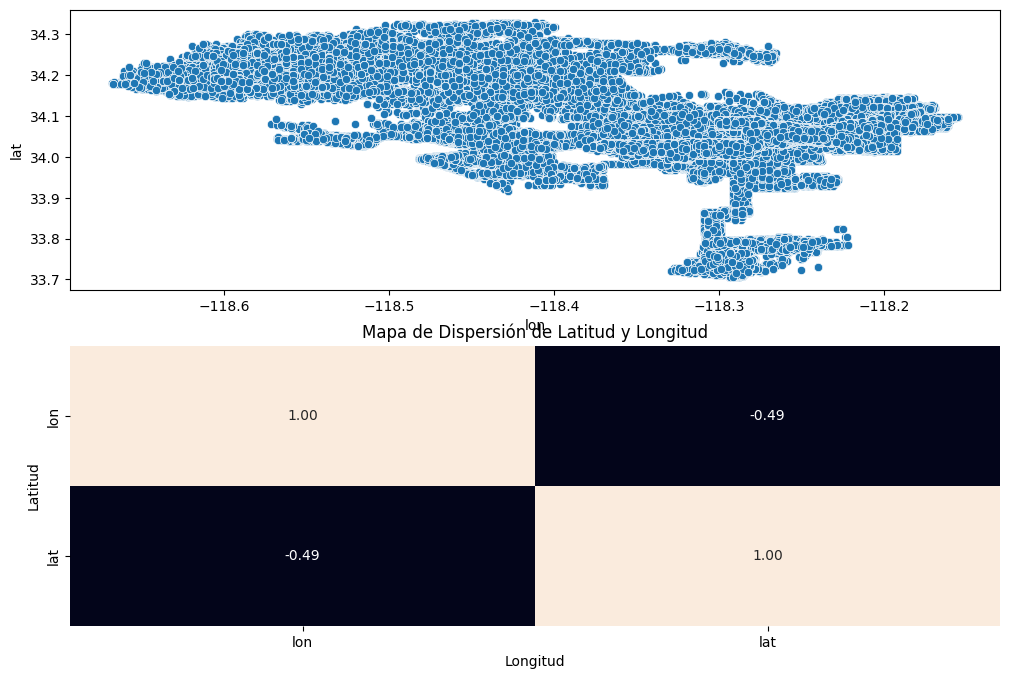

In [136]:
fig, axis = plt.subplots(2, figsize = (12, 8))

sns.scatterplot(ax = axis[0], x=total_data['lon'], y=total_data['lat'], data=total_data)
sns.heatmap(total_data[["lon", "lat"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
plt.title('Mapa de Dispersión de Latitud y Longitud')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

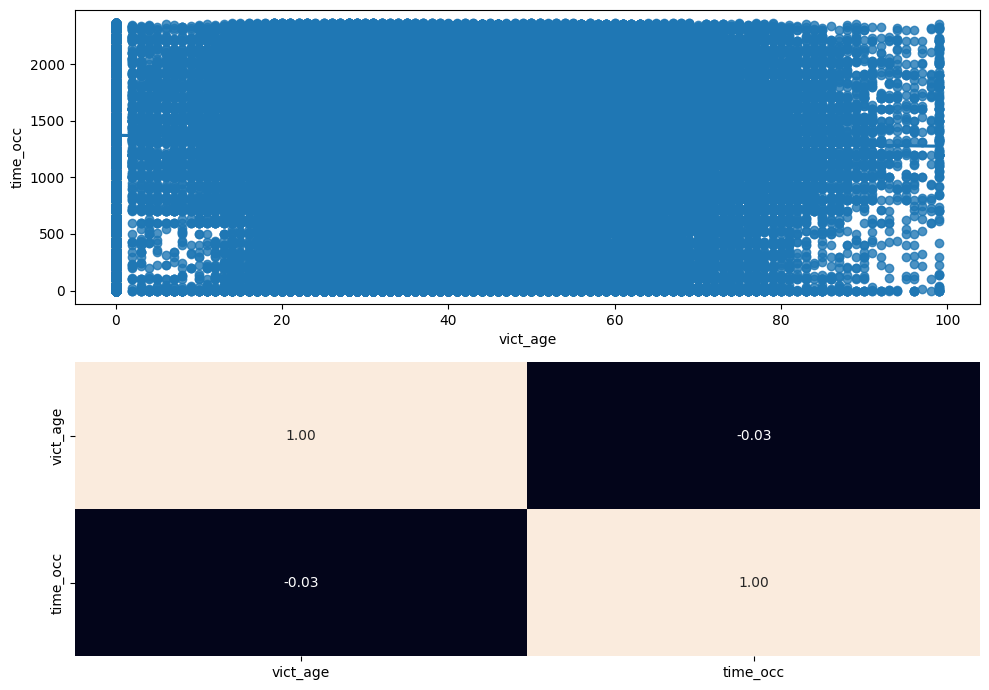

In [137]:
fig, axis = plt.subplots(2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0], data = total_data, x = "vict_age", y = "time_occ")
sns.heatmap(total_data[["vict_age", "time_occ"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [138]:
total_data["weapon_desc"].fillna("No weapon used", inplace = True)
total_data["weapon_desc"] 

0         STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
1                            UNKNOWN WEAPON/OTHER WEAPON
2                                         No weapon used
3                                         No weapon used
4                                         No weapon used
                               ...                      
433931                                    No weapon used
433932                                    No weapon used
433933    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
433934                                    No weapon used
433935                                    No weapon used
Name: weapon_desc, Length: 432924, dtype: object

In [139]:
total_data = total_data.reset_index(drop=True)

In [140]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432924 entries, 0 to 432923
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      432924 non-null  datetime64[ns]
 1   time_occ      432924 non-null  int64         
 2   area_name     432924 non-null  object        
 3   rpt_dist_no   432924 non-null  int64         
 4   crm_cd_desc   432924 non-null  object        
 5   mocodes       373877 non-null  object        
 6   vict_age      432924 non-null  int64         
 7   vict_sex      376466 non-null  object        
 8   vict_descent  376463 non-null  object        
 9   premis_desc   432639 non-null  object        
 10  weapon_desc   432924 non-null  object        
 11  status_desc   432924 non-null  object        
 12  location      432924 non-null  object        
 13  lat           432924 non-null  float64       
 14  lon           432924 non-null  float64       
 15  month         432

In [141]:
total_data["vict_sex"].fillna("X", inplace = True)
total_data["vict_descent"].fillna("X", inplace = True)

In [142]:
total_data.dropna(subset=["premis_desc"], inplace = True, ignore_index = True)

In [143]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432639 entries, 0 to 432638
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      432639 non-null  datetime64[ns]
 1   time_occ      432639 non-null  int64         
 2   area_name     432639 non-null  object        
 3   rpt_dist_no   432639 non-null  int64         
 4   crm_cd_desc   432639 non-null  object        
 5   mocodes       373597 non-null  object        
 6   vict_age      432639 non-null  int64         
 7   vict_sex      432639 non-null  object        
 8   vict_descent  432639 non-null  object        
 9   premis_desc   432639 non-null  object        
 10  weapon_desc   432639 non-null  object        
 11  status_desc   432639 non-null  object        
 12  location      432639 non-null  object        
 13  lat           432639 non-null  float64       
 14  lon           432639 non-null  float64       
 15  month         432

In [144]:
total_data = total_data.loc[total_data["vict_age"] > 0]
total_data = total_data.reset_index()

In [145]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322660 entries, 0 to 322659
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         322660 non-null  int64         
 1   date_occ      322660 non-null  datetime64[ns]
 2   time_occ      322660 non-null  int64         
 3   area_name     322660 non-null  object        
 4   rpt_dist_no   322660 non-null  int64         
 5   crm_cd_desc   322660 non-null  object        
 6   mocodes       320504 non-null  object        
 7   vict_age      322660 non-null  int64         
 8   vict_sex      322660 non-null  object        
 9   vict_descent  322660 non-null  object        
 10  premis_desc   322660 non-null  object        
 11  weapon_desc   322660 non-null  object        
 12  status_desc   322660 non-null  object        
 13  location      322660 non-null  object        
 14  lat           322660 non-null  float64       
 15  lon           322

In [146]:
vict_sex = total_data["vict_sex"].value_counts()
vict_sex

vict_sex
M    162457
F    153819
X      6384
Name: count, dtype: int64

In [147]:
vict_descent = total_data["vict_descent"].value_counts()
vict_descent

vict_descent
H    131854
W     75576
B     61575
O     26937
A      9625
X      8470
K      2201
C      2171
F      1900
J       690
V       561
I       512
Z       248
P       133
U        66
D        54
G        33
L        33
S        21
Name: count, dtype: int64

In [148]:
codigos = pd.read_csv("../data/raw/mo_codes_data.csv")
codigos

,REV: 07/19
0,0100 Suspect Impersonate
1,0101 Aid victim
2,0102 Blind
3,0103 Physically disabled
4,0104 Customer
...,...
858,4025 T/C - South Traffic (STD)
859,4026 T/C - Valley Traffic (VTD)
860,4027 T/C - West Traffic (WTD)TRAFFIC COLLISION...
861,NUMERICAL


In [149]:
codigos["mocodes"] = codigos["REV: 07/19"].str[:4]
codigos["mocodes_desc"] = codigos["REV: 07/19"].str[4:]
codigos

,REV: 07/19,mocodes,mocodes_desc
0,0100 Suspect Impersonate,0100,Suspect Impersonate
1,0101 Aid victim,0101,Aid victim
2,0102 Blind,0102,Blind
3,0103 Physically disabled,0103,Physically disabled
4,0104 Customer,0104,Customer
...,...,...,...
858,4025 T/C - South Traffic (STD),4025,T/C - South Traffic (STD)
859,4026 T/C - Valley Traffic (VTD),4026,T/C - Valley Traffic (VTD)
860,4027 T/C - West Traffic (WTD)TRAFFIC COLLISION...,4027,T/C - West Traffic (WTD)TRAFFIC COLLISION (C...
861,NUMERICAL,NUME,RICAL


In [150]:
codigos.drop("REV: 07/19", axis = 1, inplace = True)
codigos

,mocodes,mocodes_desc
0,0100,Suspect Impersonate
1,0101,Aid victim
2,0102,Blind
3,0103,Physically disabled
4,0104,Customer
...,...,...
858,4025,T/C - South Traffic (STD)
859,4026,T/C - Valley Traffic (VTD)
860,4027,T/C - West Traffic (WTD)TRAFFIC COLLISION (C...
861,NUME,RICAL


In [151]:
codigos = codigos[~codigos['mocodes'].str.contains(r'[a-zA-Z- ]')]

In [152]:
codigos

,mocodes,mocodes_desc
0,0100,Suspect Impersonate
1,0101,Aid victim
2,0102,Blind
3,0103,Physically disabled
4,0104,Customer
...,...,...
856,4021,T/C - Topanga
857,4024,T/C - Central Traffic (CTD)
858,4025,T/C - South Traffic (STD)
859,4026,T/C - Valley Traffic (VTD)


In [153]:
#codigos["mo_codes"] = codigos["mo_codes"].astype(int)
codigos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 0 to 860
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mocodes       824 non-null    object
 1   mocodes_desc  824 non-null    object
dtypes: object(2)
memory usage: 19.3+ KB


In [154]:
codigos

,mocodes,mocodes_desc
0,0100,Suspect Impersonate
1,0101,Aid victim
2,0102,Blind
3,0103,Physically disabled
4,0104,Customer
...,...,...
856,4021,T/C - Topanga
857,4024,T/C - Central Traffic (CTD)
858,4025,T/C - South Traffic (STD)
859,4026,T/C - Valley Traffic (VTD)


In [155]:
codigos.reset_index(drop=True, inplace=True)
codigos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mocodes       824 non-null    object
 1   mocodes_desc  824 non-null    object
dtypes: object(2)
memory usage: 13.0+ KB


In [156]:
total_data["mocodes"].head()

0              0444 0913
1         0416 1822 1414
2              0329 1402
3                   0329
4    0413 1822 1262 1415
Name: mocodes, dtype: object

In [165]:
mocodes = pd.DataFrame()
mocodes['mocodes_desc']=total_data['mocodes'].str.split(" ")
# mocodes['mocodes_desc'] = mocodes['mocodes']
# mocodes.dropna(subset = "mocodes", axis = 0, how = "any", inplace = True)
# mocodes.reset_index(drop=True, inplace=True)

In [166]:
mocodes

,mocodes_desc
0,"[0444, 0913]"
1,"[0416, 1822, 1414]"
2,"[0329, 1402]"
3,[0329]
4,"[0413, 1822, 1262, 1415]"
...,...
322655,"[1300, 1307, 0344]"
322656,"[0529, 2004]"
322657,"[0448, 0913, 1813, 2000]"
322658,"[1822, 0344]"


In [167]:
mocodes.fillna("0", inplace = True)

In [168]:
mocodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322660 entries, 0 to 322659
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   mocodes_desc  322660 non-null  object
dtypes: object(1)
memory usage: 2.5+ MB


In [169]:
codigos_dict = dict(zip(codigos["mocodes"], codigos["mocodes_desc"]))

for idx, code_list in enumerate(mocodes["mocodes_desc"]):
    for i, code in enumerate(code_list):
        if code in codigos_dict:
            mocodes.at[idx, 'mocodes_desc'][i] = codigos_dict[code]

mocodes

,mocodes_desc
0,"[ Pushed, Victim knew Suspect]"
1,"[ Hit-Hit w/ weapon, Stranger, Photographs]"
2,"[ Vandalized, Evidence Booked (any crime)]"
3,[ Vandalized]
4,"[ Drugged, Stranger, Raped while unconscious..."
...,...
322655,"[ Vehicle involved, Breaks window, Removes v..."
322656,"[ Indecent Exposure, Suspect is homeless/tran..."
322657,"[ Grabbed, Victim knew Suspect, Susp is/was ..."
322658,"[ Stranger, Removes vict property]"


In [161]:
# for idx, code_list in enumerate(mocodes["mocodes_desc"]):
#     for code in code_list:
#         # Buscar si el código coincide en codigos["mocodes"]
#         match_indices = codigos[codigos["mocodes"] == code].index

#         # Asignar la descripción correspondiente a la nueva columna 'mocodes_desc'
#         if not match_indices.empty:
#             mocodes["mocodes_desc"].iloc[idx][mocodes["mocodes_desc"].iloc[idx].index(code)] = codigos["mocodes_desc"].iloc[match_indices[0]]

# mocodes

,mocodes_desc
0,"[ Pushed, Victim knew Suspect]"
1,"[ Hit-Hit w/ weapon, Stranger, Photographs]"
2,"[ Vandalized, Evidence Booked (any crime)]"
3,[ Vandalized]
4,"[ Drugged, Stranger, Raped while unconscious..."
...,...
322655,"[ Vehicle involved, Breaks window, Removes v..."
322656,"[ Indecent Exposure, Suspect is homeless/tran..."
322657,"[ Grabbed, Victim knew Suspect, Susp is/was ..."
322658,"[ Stranger, Removes vict property]"


In [170]:
def join_list(row):
    return ''.join(map(str, row))

# Aplicar la función a la columna "mocodes" para unir cada lista en una cadena
mocodes["mocodes_desc"] = mocodes["mocodes_desc"].apply(join_list)

mocodes

,mocodes_desc
0,Pushed Victim knew Suspect
1,Hit-Hit w/ weapon Stranger Photographs
2,Vandalized Evidence Booked (any crime)
3,Vandalized
4,Drugged Stranger Raped while unconscious Rape...
...,...
322655,Vehicle involved Breaks window Removes vict p...
322656,Indecent Exposure Suspect is homeless/transient
322657,Grabbed Victim knew Suspect Susp is/was curre...
322658,Stranger Removes vict property


In [163]:
total_data["mocodes_desc"] = mocodes["mocodes_desc"]
total_data.head()

,index,date_occ,time_occ,area_name,rpt_dist_no,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,month,weekday,mocodes_desc
0,0,2020-01-08,2230,Southwest,377,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,34.0141,-118.2978,Wednesday,January,Pushed Victim knew Suspect
1,1,2020-01-01,330,Central,163,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545,Wednesday,January,Hit-Hit w/ weapon Stranger Photographs
2,3,2020-01-01,1730,N Hollywood,1543,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",No weapon used,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019,Wednesday,January,Vandalized Evidence Booked (any crime)
3,4,2020-01-01,415,Mission,1998,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,No weapon used,Invest Cont,14400 TITUS ST,34.2198,-118.4468,Wednesday,January,Vandalized
4,5,2020-01-01,30,Central,163,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S BROADWAY,34.0452,-118.2534,Wednesday,January,Drugged Stranger Raped while unconscious Rape...


In [164]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322660 entries, 0 to 322659
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         322660 non-null  int64         
 1   date_occ      322660 non-null  datetime64[ns]
 2   time_occ      322660 non-null  int64         
 3   area_name     322660 non-null  object        
 4   rpt_dist_no   322660 non-null  int64         
 5   crm_cd_desc   322660 non-null  object        
 6   mocodes       320504 non-null  object        
 7   vict_age      322660 non-null  int64         
 8   vict_sex      322660 non-null  object        
 9   vict_descent  322660 non-null  object        
 10  premis_desc   322660 non-null  object        
 11  weapon_desc   322660 non-null  object        
 12  status_desc   322660 non-null  object        
 13  location      322660 non-null  object        
 14  lat           322660 non-null  float64       
 15  lon           322

# hasta aqui bien

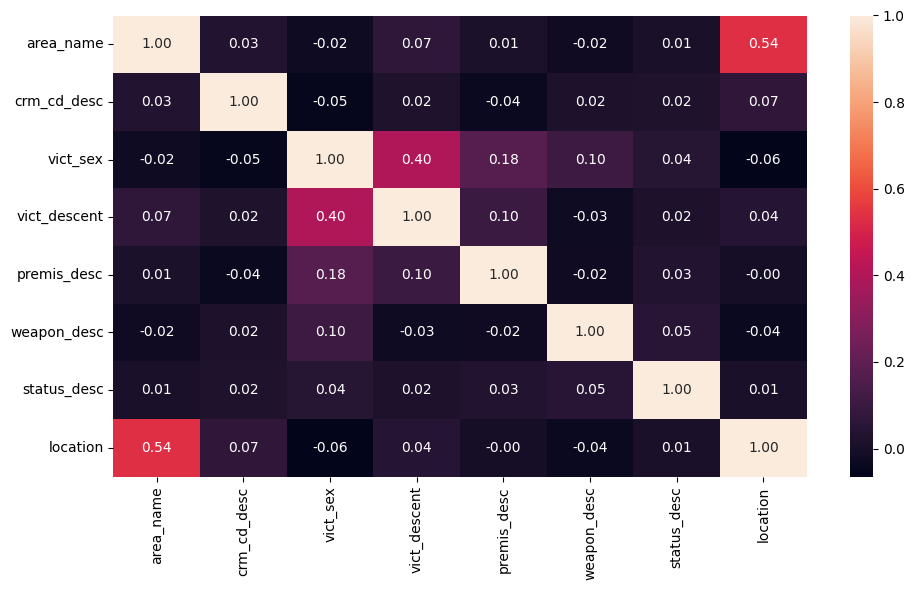

In [131]:
total_data["area_name"] = pd.factorize(total_data["area_name"])[0]
total_data["crm_cd_desc"] = pd.factorize(total_data["crm_cd_desc"])[0]
total_data["vict_sex"] = pd.factorize(total_data["vict_sex"])[0]
total_data["vict_descent"] = pd.factorize(total_data["vict_descent"])[0]
total_data["premis_desc"] = pd.factorize(total_data["premis_desc"])[0]
total_data["weapon_desc"] = pd.factorize(total_data["weapon_desc"])[0]
total_data["status_desc"] = pd.factorize(total_data["status_desc"])[0]
total_data["location"] = pd.factorize(total_data["location"])[0]

fig, axis = plt.subplots(figsize = (10, 6))
sns.heatmap(total_data[['area_name', 'crm_cd_desc', 'vict_sex', 'vict_descent',
       'premis_desc', 'weapon_desc', 'status_desc', 'location']].corr(), annot = True, fmt = ".2f")
plt.tight_layout()
plt.show()

In [124]:
str_columns=total_data.select_dtypes(include='object').columns

In [125]:
lst=[pd.factorize(total_data[i])[0] for i in str_columns]
lst

[array([0, 1, 1, ..., 1, 1, 0], dtype=int64),
 array([ 0,  0,  1, ..., 17, 68, 65], dtype=int64),
 array([    0,     1,     2, ..., 27348,   679,  2802], dtype=int64),
 array([0, 1, 2, ..., 1, 0, 1], dtype=int64),
 array([0, 1, 2, ..., 3, 1, 3], dtype=int64),
 array([0, 1, 2, ..., 0, 5, 0], dtype=int64),
 array([0, 1, 2, ..., 0, 2, 2], dtype=int64),
 array([0, 1, 2, ..., 0, 1, 1], dtype=int64),
 array([   0,    1,    2, ...,  295,  157, 3890], dtype=int64),
 array([0, 0, 1, ..., 2, 2, 1], dtype=int64),
 array([0, 0, 1, ..., 8, 8, 6], dtype=int64)]

In [126]:
columnas_factorizadas = {i: dict(zip(total_data[i], pd.factorize(total_data[i])[0])) for i in str_columns}

In [127]:
resultados_json = pd.Series(columnas_factorizadas).to_json(indent=2)

with open('../data/interim/fact.json', 'w') as file:
    file.write(resultados_json)

In [129]:
x={col:  pd.factorize(total_data[col])[0] for col in str_columns}

In [135]:
total_data.columns

Index(['date_occ', 'time_occ', 'area_name', 'rpt_dist_no', 'crm_cd_desc',
       'mocodes', 'vict_age', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'lat', 'lon', 'month',
       'weekday'],
      dtype='object')

ValueError: could not convert string to float: 'Wednesday'

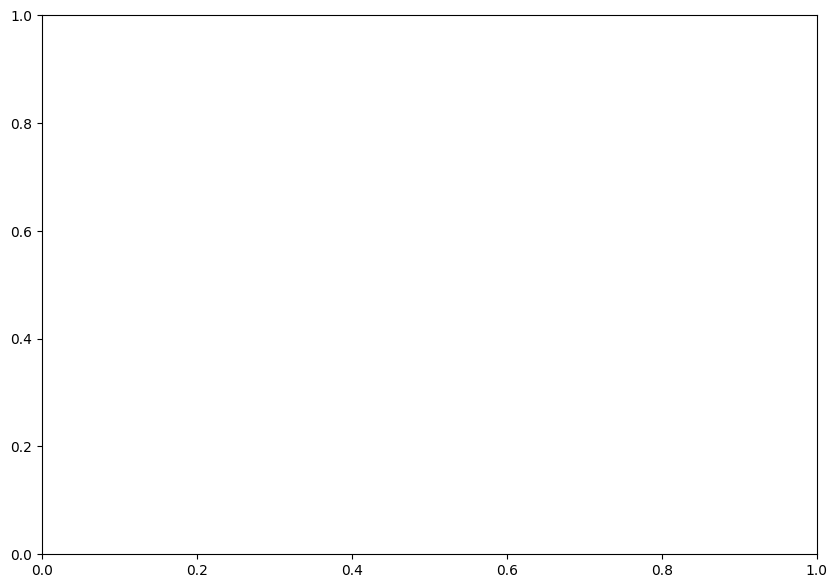

In [136]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[['date_occ', 'time_occ', 'area_name', 'rpt_dist_no', 'crm_cd_desc',
        'vict_age', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'lat', 'lon', 'month',
       'weekday']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [ ]:
total_data['mocodes'] = total_data['mocodes'].astype(str)

In [ ]:
total_data['mocodes'] = total_data['mocodes'].apply(lambda x: x.split(' '))

In [ ]:
total_data['mocodes'].head()

0          [0444, 0913]
1    [0416, 1822, 1414]
2                [1501]
3          [0329, 1402]
4                [0329]
Name: mocodes, dtype: object

In [64]:
# Contar el número total de crímenes por área
total_crimes_by_area = total_data.groupby('area_name')['crm_cd_desc'].count().reset_index()
total_crimes_by_area.columns = ['area_name', 'total_crimes']

# Contar el número de crímenes específicos (puedes ajustar esto según tus necesidades)
specific_crime_count_by_area = total_data.groupby(['area_name', 'crm_cd_desc']).size().reset_index(name='crime_count')

# Unir los dos conjuntos de datos
merged_total_data = pd.merge(total_crimes_by_area, specific_crime_count_by_area, on='area_name')

# Calcular el porcentaje de crímenes por área
merged_total_data['crime_percentage'] = (merged_total_data['crime_count'] / merged_total_data['total_crimes']) * 100

# Encontrar el tipo de crimen con el mayor porcentaje por área
max_crime_by_area = merged_total_data.loc[merged_total_data.groupby('area_name')['crime_percentage'].idxmax()]

# Mostrar el resultado
print(max_crime_by_area[['area_name', 'crm_cd_desc', 'crime_percentage']])

        area_name                                     crm_cd_desc  \
1     77th Street  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT   
110       Central                           BURGLARY FROM VEHICLE   
215    Devonshire                                        BURGLARY   
291      Foothill                        BATTERY - SIMPLE ASSAULT   
376        Harbor                        BATTERY - SIMPLE ASSAULT   
474    Hollenbeck                        BATTERY - SIMPLE ASSAULT   
571     Hollywood                        BATTERY - SIMPLE ASSAULT   
734       Mission                               THEFT OF IDENTITY   
753   N Hollywood                        BATTERY - SIMPLE ASSAULT   
838        Newton                        BATTERY - SIMPLE ASSAULT   
930     Northeast                           BURGLARY FROM VEHICLE   
1011      Olympic                        BATTERY - SIMPLE ASSAULT   
1167      Pacific              THEFT PLAIN - PETTY ($950 & UNDER)   
1188      Rampart                 